## Handwritten digits recognition using Tensorflow 2.0

In [1]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Datasets

In [2]:
# importing data from scikit-learn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [37]:
# extract the training sets
X, y = mnist['data'], mnist['target']

In [38]:
# view the image
digit_1 = X[0]
digit_1_image = digit_1.reshape(28, 28)

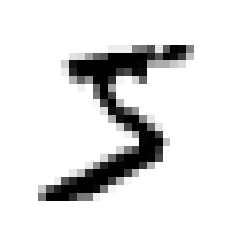

In [74]:
plt.imshow(digit_1_image, cmap=plt.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [40]:
# verify the target
y[0]

'5'

### Pre-processing

In [41]:
# convert the strings to integers
y = y.astype(np.uint8)

In [42]:
# reshape the array for tensorflow
m = X.shape[0]
X_new = np.zeros((m, 28, 28), dtype=float)
for i in range(m):
    digit = X[i].reshape(28, 28)
    X_new[i] = digit

In [43]:
# scaling the values to a range 0 to 1
X_new = X_new/ 255.0

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.15, random_state = 0)

### Building Neural Network

In [45]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [46]:
# Building the neural network requires configuring the layers of the model, then compiling the model.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [47]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [48]:
# train the model
model.fit(X_train, y_train, epochs=10)

Train on 59500 samples
Epoch 1/10
59500/59500 [==============================] - 5s 86us/sample - loss: 0.2546 - accuracy: 0.9267
Epoch 2/10
59500/59500 [==============================] - 4s 68us/sample - loss: 0.1100 - accuracy: 0.9676
Epoch 3/10
59500/59500 [==============================] - 4s 67us/sample - loss: 0.0764 - accuracy: 0.9765
Epoch 4/10
59500/59500 [==============================] - 4s 68us/sample - loss: 0.0565 - accuracy: 0.9823
Epoch 5/10
59500/59500 [==============================] - 4s 67us/sample - loss: 0.0428 - accuracy: 0.9865
Epoch 6/10
59500/59500 [==============================] - 4s 68us/sample - loss: 0.0351 - accuracy: 0.9885
Epoch 7/10
59500/59500 [==============================] - 4s 68us/sample - loss: 0.0276 - accuracy: 0.9916
Epoch 8/10
59500/59500 [==============================] - 4s 67us/sample - loss: 0.0230 - accuracy: 0.9924
Epoch 9/10
59500/59500 [==============================] - 4s 67us/sample - loss: 0.0182 - accuracy: 0.9944
Epoch 10/10
59

### Evaluating accuracy

In [49]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10500/1 - 1s - loss: 0.0439 - accuracy: 0.9764

Test accuracy: 0.97638094


### Predicting the results using test set

In [50]:
# make predictions
predictions = model.predict(X_test)

In [51]:
# inspect the first prediction
predictions[0]

array([9.9993491e-01, 2.2084468e-15, 1.8014081e-09, 3.7865548e-12,
       6.4724831e-10, 3.1075447e-07, 6.2514911e-05, 5.0013924e-11,
       4.6816680e-07, 1.7334690e-06], dtype=float32)

In [52]:
np.argmax(predictions[0])

0

In [53]:
y_test[0]

0

In [60]:
# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

    
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

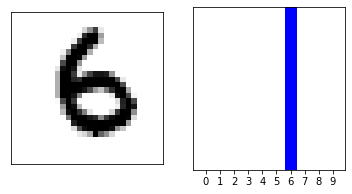

In [72]:
i = 637
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

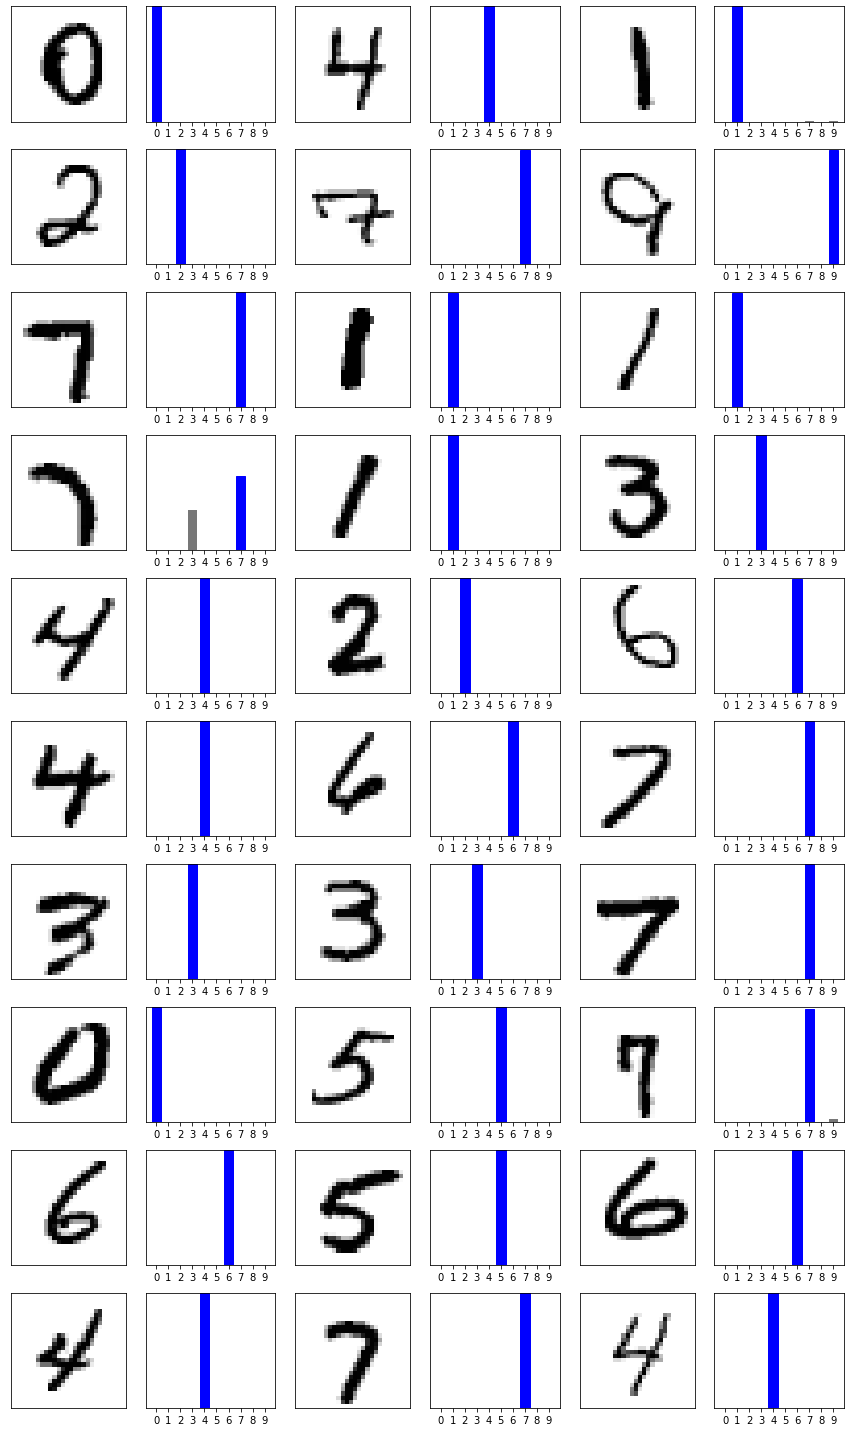

In [67]:
# Plot the first X test images and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()